In [1]:
import torch
import pandas as pd
from deep_learning.loaders.feature_dataset import FeatureDataset
from deep_learning.models.attention_core.clam import Clam,ClamSimple
from deep_learning.services.attention_score_service import *
from torch.utils.data import DataLoader
from deep_learning.services.file_and_data_service import FileDataService
from deep_learning.services.attention_visualization_service import ImageComposer

device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

import json

model=ClamSimple(
    feature_vector_length=1280,
    dropout=0.1,
    k_sample=8,
    n_classes=6,
    subtyping=False
)

model.load_state_dict(torch.load("F:/logs/effnet_clam_simple/20250314_230421_p7_b80/model_weights_4.pth"))

df=pd.read_csv("F:/data/train_stratified.csv")
feature_path="F:/extracted_features_effnet"
dataset=FeatureDataset(df,feature_path)
data_loader=DataLoader(dataset, batch_size=1, shuffle=True,num_workers=0)

model.to(device)
model.eval()
statlist=[]
print(f"Data Length: {len(data_loader)}")
for count,( features,label) in enumerate(data_loader):
    features=features.squeeze()
    Y_prob,A=get_attention_scores(model, features,1,False)
    stats=get_attention_scores_for_each_class(A)
    stats={"label":Y_prob.argmax().item(),**stats}
    statlist.append(stats)
    if count%100==0:
        print(f"{count} Done")
print("Finished")


Data Length: 8154
0 Done
100 Done
200 Done
300 Done
400 Done
500 Done
600 Done
700 Done
800 Done
900 Done
1000 Done
1100 Done
1200 Done
1300 Done
1400 Done
1500 Done
1600 Done
1700 Done
1800 Done
1900 Done
2000 Done
2100 Done
2200 Done
2300 Done
2400 Done
2500 Done
2600 Done
2700 Done
2800 Done
2900 Done
3000 Done
3100 Done
3200 Done
3300 Done
3400 Done
3500 Done


KeyboardInterrupt: 

In [2]:
print(statlist[0])

{'label': 1, 0: array([ 2.1838458 ,  1.8125472 ,  1.814298  ,  1.4774643 ,  0.014511  ,
        0.05742805,  2.027911  , -2.0170758 ,  0.21310818, -0.6701993 ,
       -1.2132739 , -0.9358798 ,  1.7068822 , -2.229117  , -2.1564622 ,
        1.8738346 ,  0.38445085, -1.9736391 , -1.3608788 ,  0.8600668 ,
        0.98417735,  0.6374885 , -2.1960661 , -2.8476207 , -2.8562512 ,
       -1.937971  ,  1.1491983 ,  1.3217105 , -2.5265005 , -2.7990623 ,
       -2.4640882 , -2.9486794 ,  1.6583147 ,  0.14494413, -2.8464453 ,
       -2.8382237 ,  0.7332581 ,  1.8567246 ,  1.484658  , -1.1610292 ,
        0.6393291 ,  2.1408958 ,  0.32113498, -0.19446763,  0.65628314,
       -1.5416057 , -2.1059203 ,  1.2475268 , -1.2390634 , -2.1895492 ,
       -0.73677254, -0.6256815 ,  0.9848491 ,  0.85926986, -0.3567504 ,
       -0.4495127 , -1.3036941 ,  2.1575763 ,  0.4961547 ,  0.975804  ,
        1.61988   , -2.8535373 , -1.0611132 ,  0.745527  ,  0.48643428,
        1.8799001 ,  1.042915  ,  1.9803876 ,  1

In [3]:
import numpy as np
stats={}
for i in range(6):
    print(f"Calculate {i} stats")
    labeled= list(filter(lambda x: x['label']==i,statlist))
    length=len(labeled)
    result_dict={j:[] for j in range(6)}
    for index, data in enumerate(labeled):
        for k in range(6):
            result_dict[k].extend(data[k])
    stats[i]=result_dict
    print(f"Done {i} stats")

Calculate 0 stats
Done 0 stats
Calculate 1 stats
Done 1 stats
Calculate 2 stats
Done 2 stats
Calculate 3 stats
Done 3 stats
Calculate 4 stats
Done 4 stats
Calculate 5 stats
Done 5 stats


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def create_data_for_vis(core_data):
    data_dict={
        f"Bag Class {a}":[core_data[a][b] for b in range(6)]
        for a in range(6)
    }
    return data_dict



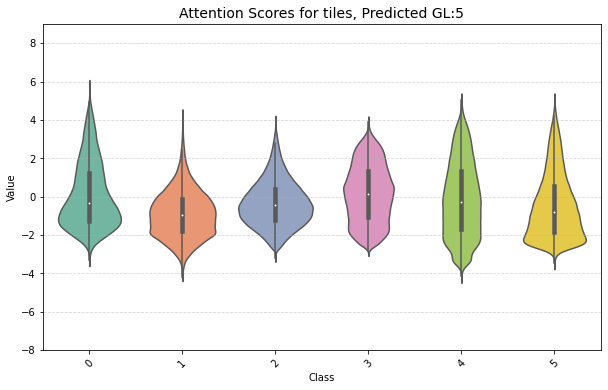

: 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bag=5
df=pd.DataFrame([(key,value) for key,values in stats[bag].items() for value in values], columns=['Class', 'Value'])

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Class", y="Value", inner="box", palette="Set2")

# Customize the plot
plt.title(f"Attention Scores for tiles, Predicted GL:{bag}", fontsize=14)
plt.xlabel("Class")
plt.ylabel("Value")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.ylim(-8, 9)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.show()